In [1]:
import pandas as pd

summaries = []
MODELS = ["gpt-3.5-turbo", "gpt-4", "gpt-4o", "insolvency_bot_with_gpt-3.5-turbo", "insolvency_bot_with_gpt-4", "insolvency_bot_with_gpt-4o"]
DATASETS = ["train", "test"]

for MODEL in MODELS:
    for DATASET in DATASETS:
        df = pd.read_csv(f"scores_{DATASET}_{MODEL}.csv", encoding="utf-8", sep="\t")
        
        # Drop the TOTAL row
        df = df[df.question_no != "TOTAL"]
        
        summaries.append((MODEL, DATASET, df.bot_response_time.median(),  df["bot_score"].sum(), df["max_points_available"].sum()))

/home/thomas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_summary = pd.DataFrame()
df_summary["model"] = [s[0] for s in summaries]
df_summary["dataset"] = [s[1] for s in summaries]
df_summary["median_response_time"] = [s[2] for s in summaries]
df_summary["total_score"] = [s[3] for s in summaries]
df_summary["available_score"] = [s[4] for s in summaries]

In [3]:
df_summary["percentage_score"] = df_summary.total_score / df_summary.available_score * 100

In [4]:
df_summary

,model,dataset,median_response_time,total_score,available_score,percentage_score
0,gpt-3.5-turbo,train,5.222760,53.0,298,17.785235
1,gpt-3.5-turbo,test,8.425750,60.0,296,20.270270
2,gpt-4,train,21.641649,86.5,298,29.026846
3,gpt-4,test,33.479660,61.5,296,20.777027
4,gpt-4o,train,4.615740,71.0,298,23.825503
5,gpt-4o,test,4.961722,63.0,296,21.283784
6,insolvency_bot_with_gpt-3.5-turbo,train,5.474656,85.0,298,28.523490
7,insolvency_bot_with_gpt-3.5-turbo,test,9.466624,87.5,296,29.560811
8,insolvency_bot_with_gpt-4,train,33.877039,107.5,298,36.073826
9,insolvency_bot_with_gpt-4,test,52.644380,139.0,296,46.959459


In [5]:
df_summary.to_csv("score_summary.csv", encoding="utf-8", sep="\t", index=False)

In [6]:
import numpy as np

In [7]:
import fastdatascience

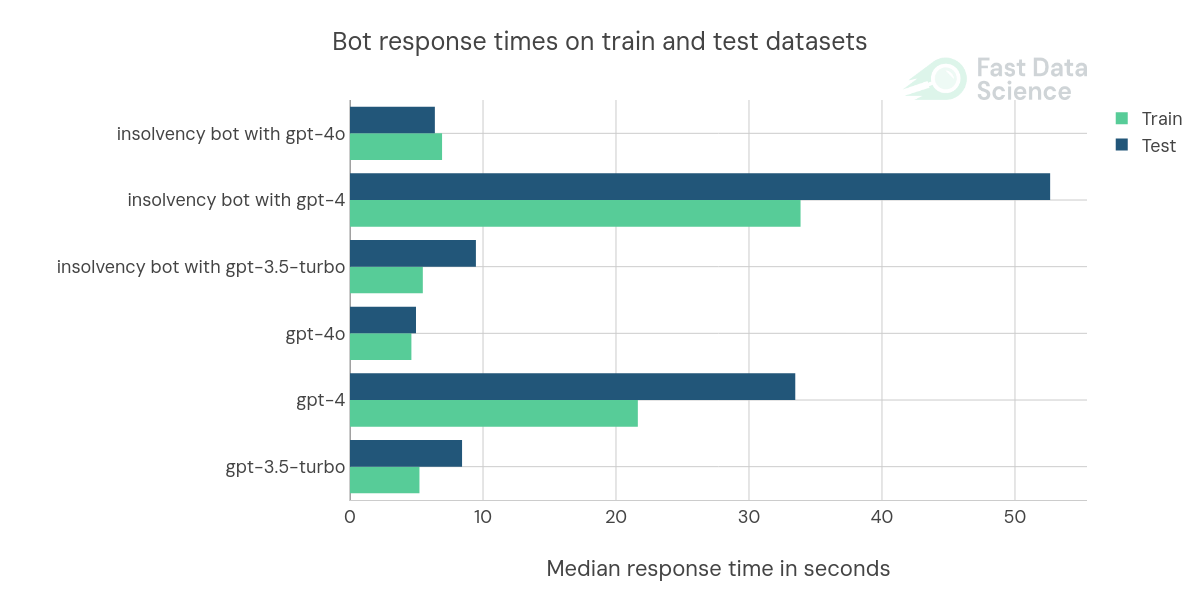

In [8]:
import re
import plotly.graph_objects as px
import numpy
 
 
 
fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].median_response_time),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].median_response_time),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot response times on train and test datasets",
    margin=dict(l=350, r=100, t=100, b=100),
    xaxis_title="Median response time in seconds",
)

fig.show(renderer="png")

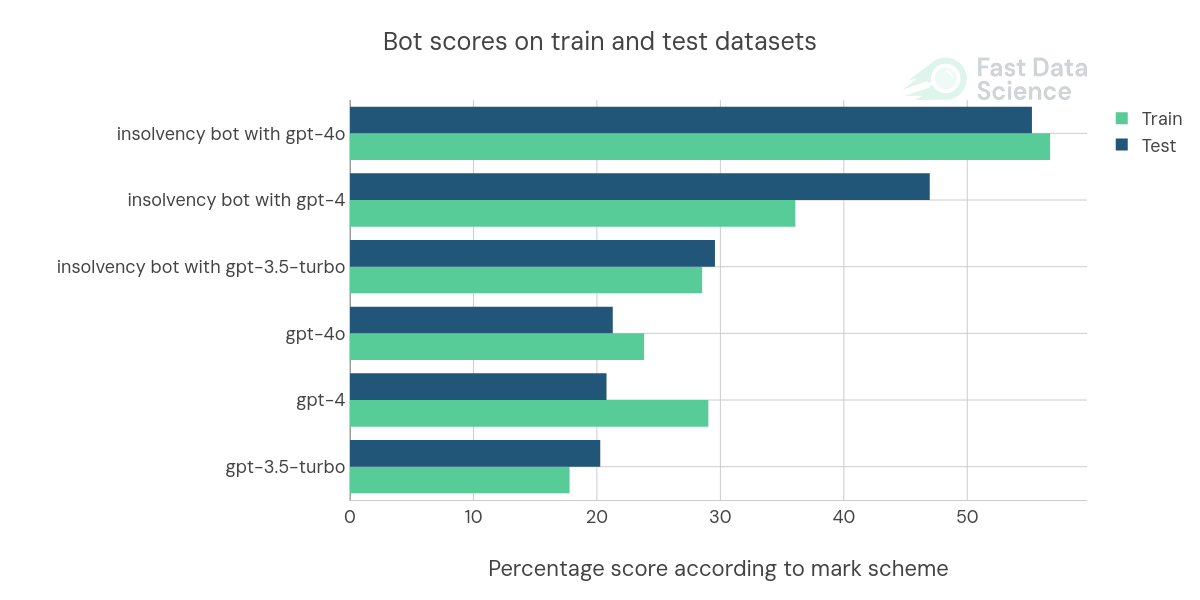

In [9]:
import re
import plotly.graph_objects as px
import numpy
 
 
 
fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].percentage_score),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].percentage_score),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot scores on train and test datasets",
    margin=dict(l=350, r=100, t=100, b=100),
    xaxis_title="Percentage score according to mark scheme",
)

fig.show(renderer="png")